# Hull Moving Average

https://www.incrediblecharts.com/indicators/hull-moving-average.php

https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/hull-moving-average

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = '^nsei'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [3]:
import talib as ta

In [4]:
n = 30
df['WMA_1'] = ta.WMA(df['Adj Close'], timeperiod=n/2) * 2
df['WMA_2'] = df['WMA_1'] - ta.WMA(df['Adj Close'], timeperiod=n)
df['HMA'] = ta.WMA(df['WMA_2'], timeperiod=math.sqrt(n))
df = df.drop(['WMA_1', 'WMA_2'], axis=1)

In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,HMA
Date,,,,,,,
2022-12-26 00:00:00+05:30,17830.400391,18084.099609,17774.250000,18014.599609,18014.599609,176700,18256.340371
2022-12-27 00:00:00+05:30,18089.800781,18149.250000,17967.449219,18132.300781,18132.300781,214300,18180.836143
2022-12-28 00:00:00+05:30,18084.750000,18173.099609,18068.349609,18122.500000,18122.500000,193900,18119.862849
2022-12-29 00:00:00+05:30,18045.699219,18229.699219,17992.800781,18191.000000,18191.000000,281100,18077.271278
2022-12-30 00:00:00+05:30,18259.099609,18265.250000,18080.300781,18105.300781,18105.300781,192000,18045.813112


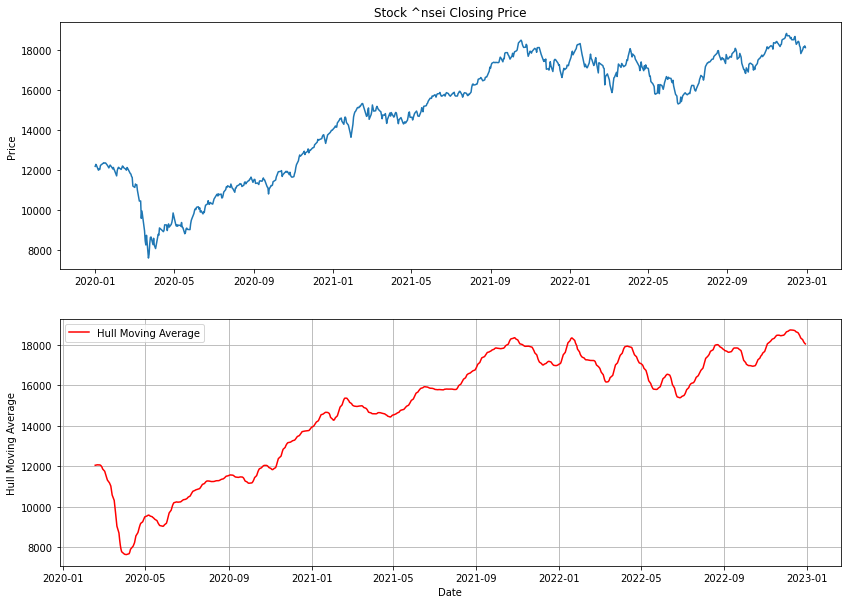

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['HMA'], label='Hull Moving Average', color='red')
#ax2.axhline(y=0, color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Hull Moving Average')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with Hull Moving Average

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,HMA,VolumePositive
0,18261.770833,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100,NaN,False
1,18262.770833,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700,NaN,True
2,18263.770833,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800,NaN,False
3,18266.770833,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500,NaN,False
4,18267.770833,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800,NaN,False


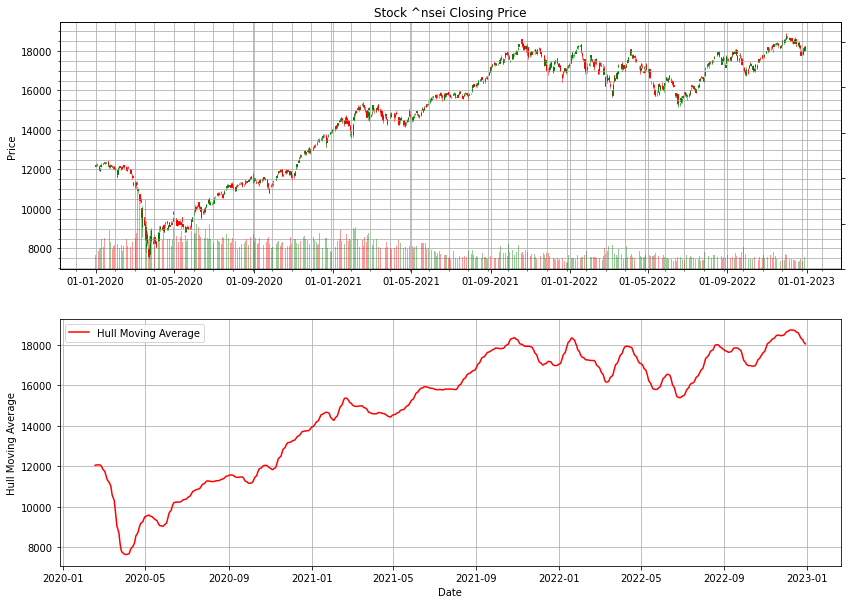

In [9]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['HMA'], label='Hull Moving Average', color='red')
#ax2.axhline(y=0, color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Hull Moving Average')
ax2.set_xlabel('Date')
ax2.legend(loc='best')